# บทเรียน GeoPandas และ GeoParquet
### สำหรับนักศึกษาภูมิศาสตร์ ชั้นปีที่ 2
### ภาควิชาภูมิศาสตร์ คณะศิลปศาสตร์ มหาวิทยาลัยธรรมศาสตร์

---

## 📚 เนื้อหาในบทเรียน

1. แนะนำ GeoPandas และความสำคัญ
2. การติดตั้งและเตรียมสภาพแวดล้อม
3. โครงสร้างข้อมูลใน GeoPandas
4. การอ่านและเขียนไฟล์ข้อมูลเชิงพื้นที่
5. การจัดการและวิเคราะห์ข้อมูลเบื้องต้น
6. การทำ Spatial Operations
7. แนะนำ GeoParquet - รูปแบบไฟล์ยุคใหม่
8. ตัวอย่างการประยุกต์ใช้จริง

---
## 1. แนะนำ GeoPandas และความสำคัญ

### GeoPandas คืออะไร?

**GeoPandas** เป็น Python library ที่ขยายความสามารถของ Pandas เพื่อทำงานกับข้อมูลเชิงพื้นที่ (Geospatial Data)

### ทำไมต้องใช้ GeoPandas?

✅ **ใช้งานง่าย** - syntax คล้าย Pandas ที่คุ้นเคย  
✅ **ทรงพลัง** - รองรับ spatial operations ครบถ้วน  
✅ **เชื่อมต่อได้หลายระบบ** - อ่าน/เขียนได้หลายรูปแบบไฟล์  
✅ **Open Source** - ใช้งานฟรี พัฒนาโดย community  
✅ **มาตรฐาน** - รองรับ OGC standards (WKT, WKB)  

### เปรียบเทียบกับซอฟต์แวร์ GIS ทั่วไป

| Feature | GeoPandas | ArcGIS/QGIS |
|---------|-----------|-------------|
| ราคา | ฟรี | ArcGIS ต้องซื้อ, QGIS ฟรี |
| Automation | ดีมาก (Python) | ปานกลาง |
| การแสดงผล | พื้นฐาน | ดีมาก |
| Big Data | ดี | จำกัด |
| Learning Curve | ปานกลาง | ง่าย (GUI) |

---
## 2. การติดตั้งและเตรียมสภาพแวดล้อม

### การติดตั้ง GeoPandas

```bash
# วิธีที่ 1: ใช้ pip (แนะนำ)
pip install geopandas

# วิธีที่ 2: ใช้ conda (ถ้าใช้ Anaconda)
conda install geopandas
```

### การติดตั้ง libraries เสริม

```bash
# สำหรับการแสดงผลและการทำงานกับ GeoParquet
pip install matplotlib folium mapclassify pyarrow
```

In [79]:
# นำเข้า libraries ที่จำเป็น
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าการแสดงผล
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.family'] = 'sans-serif'

print(f"GeoPandas version: {gpd.__version__}")
print("✅ พร้อมใช้งานแล้ว!")

GeoPandas version: 1.1.2
✅ พร้อมใช้งานแล้ว!


---
## 3. โครงสร้างข้อมูลใน GeoPandas

### GeoDataFrame vs DataFrame

- **DataFrame** (Pandas) = ตารางข้อมูลทั่วไป
- **GeoDataFrame** (GeoPandas) = ตารางข้อมูล + คอลัมน์ geometry (เรขาคณิต)

### ประเภทของ Geometry

1. **Point** - จุด (เช่น ตำแหน่งโรงเรียน, ตำแหน่ง GPS)
2. **LineString** - เส้น (เช่น ถนน, แม่น้ำ)
3. **Polygon** - รูปหลายเหลี่ยม (เช่น เขตจังหวัด, แปลงที่ดิน)
4. **MultiPoint, MultiLineString, MultiPolygon** - หลายรูปร่างรวมกัน

In [80]:
# สร้าง GeoDataFrame แบบง่ายๆ

# 1. สร้างข้อมูลตัวอย่าง - มหาวิทยาลัยในกรุงเทพฯ
data = {
    'university': ['มธ. ท่าพระจันทร์', 'มธ. รังสิต', 'จุฬาฯ', 'ธรรมศาสตร์ ศูนย์ลำปาง'],
    'province': ['กรุงเทพฯ', 'ปทุมธานี', 'กรุงเทพฯ', 'ลำปาง'],
    'students': [15000, 25000, 35000, 3000],
    'latitude': [13.7563, 14.0693, 13.7369, 18.2930],
    'longitude': [100.4938, 100.6075, 100.5316, 99.5126]
}

# 2. สร้าง DataFrame ธรรมดา
df = pd.DataFrame(data)
print("📊 DataFrame ธรรมดา:")
print(df)
print(f"\nประเภท: {type(df)}")

📊 DataFrame ธรรมดา:
              university  province  students  latitude  longitude
0       มธ. ท่าพระจันทร์  กรุงเทพฯ     15000   13.7563   100.4938
1             มธ. รังสิต  ปทุมธานี     25000   14.0693   100.6075
2                  จุฬาฯ  กรุงเทพฯ     35000   13.7369   100.5316
3  ธรรมศาสตร์ ศูนย์ลำปาง     ลำปาง      3000   18.2930    99.5126

ประเภท: <class 'pandas.core.frame.DataFrame'>


In [81]:
# 3. แปลง DataFrame เป็น GeoDataFrame
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

print("🗺️ GeoDataFrame:")
print(gdf)
print(f"\nประเภท: {type(gdf)}")
print(f"\nระบบพิกัด (CRS): {gdf.crs}")

🗺️ GeoDataFrame:
              university  province  students  latitude  longitude  \
0       มธ. ท่าพระจันทร์  กรุงเทพฯ     15000   13.7563   100.4938   
1             มธ. รังสิต  ปทุมธานี     25000   14.0693   100.6075   
2                  จุฬาฯ  กรุงเทพฯ     35000   13.7369   100.5316   
3  ธรรมศาสตร์ ศูนย์ลำปาง     ลำปาง      3000   18.2930    99.5126   

                   geometry  
0  POINT (100.4938 13.7563)  
1  POINT (100.6075 14.0693)  
2  POINT (100.5316 13.7369)  
3    POINT (99.5126 18.293)  

ประเภท: <class 'geopandas.geodataframe.GeoDataFrame'>

ระบบพิกัด (CRS): EPSG:4326


In [85]:
# 4. ดูข้อมูล geometry แยกต่างหาก
print("📍 คอลัมน์ geometry:")
print(gdf.geometry)
print(f"\nประเภทของ geometry: {gdf.geometry.geom_type.unique()}")

📍 คอลัมน์ geometry:
0    POINT (100.4938 13.7563)
1    POINT (100.6075 14.0693)
2    POINT (100.5316 13.7369)
3      POINT (99.5126 18.293)
Name: geometry, dtype: geometry

ประเภทของ geometry: ['Point']


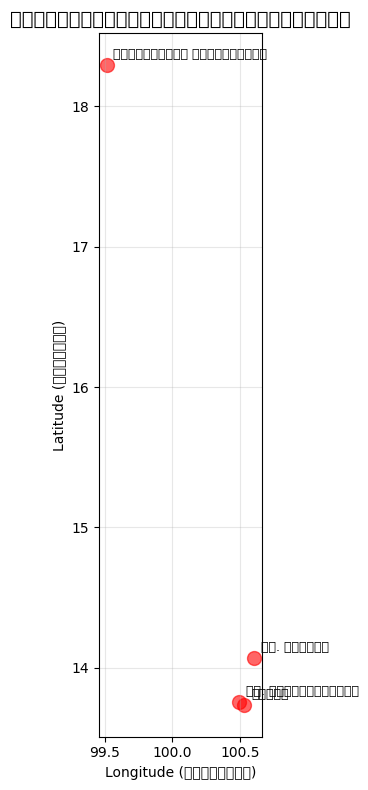

In [82]:
# 5. แสดงผลบนแผนที่อย่างง่าย
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, marker='o', color='red', markersize=100, alpha=0.6)

# เพิ่ม labels
for idx, row in gdf.iterrows():
    ax.annotate(row['university'],
                xy=(row.geometry.x, row.geometry.y),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, ha='left')

ax.set_xlabel('Longitude (ลองจิจูด)')
ax.set_ylabel('Latitude (ละติจูด)')
ax.set_title('ตำแหน่งมหาวิทยาลัยในประเทศไทย', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Installing Thai fonts...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Updating font cache...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/tlwg: caching, new cache contents: 58 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/sh

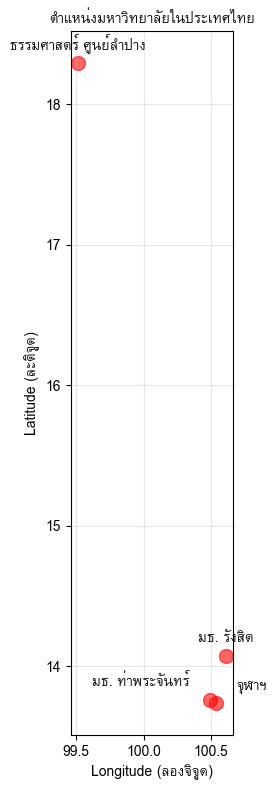

In [83]:
#แก้ไขกราฟตัวอักษรซ้อนกัน

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# Install Thai fonts (if not already installed)
# Using -qq for quieter installation
print("Installing Thai fonts...")
!sudo apt-get update -qq
!sudo apt-get install fonts-thai-tlwg -y -qq
print("Updating font cache...")
!sudo fc-cache -fv

# Forcefully clear and rebuild matplotlib's font cache
print("Clearing Matplotlib font cache and reloading...")
# Remove existing cache files to force a full rebuild
# Using a common path for matplotlib cache, as fm.get_cachedir() might not be available
matplotlib_cache_dir = os.path.expanduser('~/.cache/matplotlib')
if os.path.exists(matplotlib_cache_dir):
    for f in os.listdir(matplotlib_cache_dir):
        if f.startswith('fontlist-'):
            os.remove(os.path.join(matplotlib_cache_dir, f))
fm._load_fontmanager(try_read_cache=False) # Reload font manager forcefully

# Define the path to a known Thai font file (e.g., Garuda.ttf)
thai_font_path = '/usr/share/fonts/truetype/tlwg/Garuda.ttf'
thai_font_prop = None

# Check if the font file exists and load it
if os.path.exists(thai_font_path):
    # Explicitly add the font to matplotlib's font manager
    fm.fontManager.addfont(thai_font_path)
    # Create a FontProperties object
    thai_font_prop = fm.FontProperties(fname=thai_font_path)

    # Set the font globally for matplotlib using its internal name
    # Using get_name() ensures we use the actual font family name matplotlib recognizes
    plt.rcParams['font.family'] = [thai_font_prop.get_name()]
    # Disable unicode_minus to display Thai minus signs correctly (if applicable)
    plt.rcParams['axes.unicode_minus'] = False
    print(f"✅ Matplotlib configured to use font: '{thai_font_prop.get_name()}' from {thai_font_path}")
else:
    print(f"❌ ERROR: Thai font file not found at {thai_font_path}.")
    print("Please ensure 'fonts-thai-tlwg' is installed and the runtime might need to be restarted.")
    # Fallback to a generic sans-serif font if the specific Thai font can't be loaded
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['axes.unicode_minus'] = True # Re-enable for default font

# Display the map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, marker='o', color='red', markersize=100, alpha=0.6)

# Add labels
for idx, row in gdf.iterrows():
    offset_x, offset_y = 0, 10 # Default offset
    horizontal_alignment = 'center' # Default alignment

    if row['university'] == 'มธ. ท่าพระจันทร์':
        offset_x = -15  # Shift left
        horizontal_alignment = 'right'
    elif row['university'] == 'จุฬาฯ':
        offset_x = 15   # Shift right
        horizontal_alignment = 'left'

    # Explicitly use the FontProperties for annotate for reliability
    if thai_font_prop:
        ax.annotate(row['university'],
                    xy=(row.geometry.x, row.geometry.y),
                    xytext=(offset_x, offset_y), textcoords='offset points',
                    fontsize=10, ha=horizontal_alignment, fontproperties=thai_font_prop)
    else:
        # Fallback if thai_font_prop was not successfully loaded
        ax.annotate(row['university'],
                    xy=(row.geometry.x, row.geometry.y),
                    xytext=(offset_x, offset_y), textcoords='offset points',
                    fontsize=10, ha=horizontal_alignment)

# Set labels and title, also using the specific font properties
if thai_font_prop:
    ax.set_xlabel('Longitude (ลองจิจูด)', fontproperties=thai_font_prop)
    ax.set_ylabel('Latitude (ละติจูด)', fontproperties=thai_font_prop)
    ax.set_title('ตำแหน่งมหาวิทยาลัยในประเทศไทย', fontsize=14, fontweight='bold', fontproperties=thai_font_prop)
else:
    # Fallback if thai_font_prop was not successfully loaded
    ax.set_xlabel('Longitude (ลองจิจูด)')
    ax.set_ylabel('Latitude (ละติจูด)')
    ax.set_title('ตำแหน่งมหาวิทยาลัยในประเทศไทย', fontsize=14, fontweight='bold')

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## 4. การอ่านและเขียนไฟล์ข้อมูลเชิงพื้นที่

### รูปแบบไฟล์ที่ GeoPandas รองรับ

| รูปแบบไฟล์ | Extension | คำสั่งอ่าน | คำสั่งเขียน | หมายเหตุ |
|-----------|-----------|-----------|------------|----------|
| Shapefile | .shp | `read_file()` | `to_file()` | มาตรฐาน GIS |
| GeoJSON | .geojson | `read_file()` | `to_file()` | ใช้กับ web |
| GeoPackage | .gpkg | `read_file()` | `to_file()` | SQLite-based |
| GeoParquet | .parquet | `read_parquet()` | `to_parquet()` | เร็ว, ประหยัดพื้นที่ |
| KML | .kml | `read_file()` | `to_file()` | Google Earth |
| PostGIS | database | `read_postgis()` | `to_postgis()` | Database |

### 4.1 การอ่านไฟล์ Shapefile

In [97]:
# สร้าง GeoDataFrame แบบง่ายๆ

# 1. สร้างข้อมูลตัวอย่าง - มหาวิทยาลัยในกรุงเทพฯ
data = {
    'university': ['มธ. ท่าพระจันทร์', 'มธ. รังสิต', 'จุฬาฯ', 'ธรรมศาสตร์ ศูนย์ลำปาง'],
    'province': ['กรุงเทพฯ', 'ปทุมธานี', 'กรุงเทพฯ', 'ลำปาง'],
    'students': [15000, 25000, 35000, 3000],
    'latitude': [13.7563, 14.0693, 13.7369, 18.2930],
    'longitude': [100.4938, 100.6075, 100.5316, 99.5126]
}

# 2. สร้าง DataFrame ธรรมดา
df = pd.DataFrame(data)
print("📊 DataFrame ธรรมดา:")
print(df)
print(f"\nประเภท: {type(df)}")

📊 DataFrame ธรรมดา:
              university  province  students  latitude  longitude
0       มธ. ท่าพระจันทร์  กรุงเทพฯ     15000   13.7563   100.4938
1             มธ. รังสิต  ปทุมธานี     25000   14.0693   100.6075
2                  จุฬาฯ  กรุงเทพฯ     35000   13.7369   100.5316
3  ธรรมศาสตร์ ศูนย์ลำปาง     ลำปาง      3000   18.2930    99.5126

ประเภท: <class 'pandas.core.frame.DataFrame'>


In [91]:
# กรองเฉพาะประเทศในเอเชียตะวันออกเฉียงใต้
sea_countries = ['Thailand', 'Myanmar', 'Laos', 'Cambodia', 'Vietnam',
                 'Malaysia', 'Singapore', 'Indonesia', 'Philippines', 'Brunei']

asean = world[world['name'].isin(sea_countries)].copy()
print(f"ประเทศอาเซียนที่พบ: {len(asean)} ประเทศ")
print(asean[['name']])

ประเทศอาเซียนที่พบ: 10 ประเทศ
            name
0      Indonesia
1       Malaysia
55       Vietnam
56      Cambodia
67          Laos
110     Thailand
119       Brunei
126      Myanmar
182  Philippines
230    Singapore


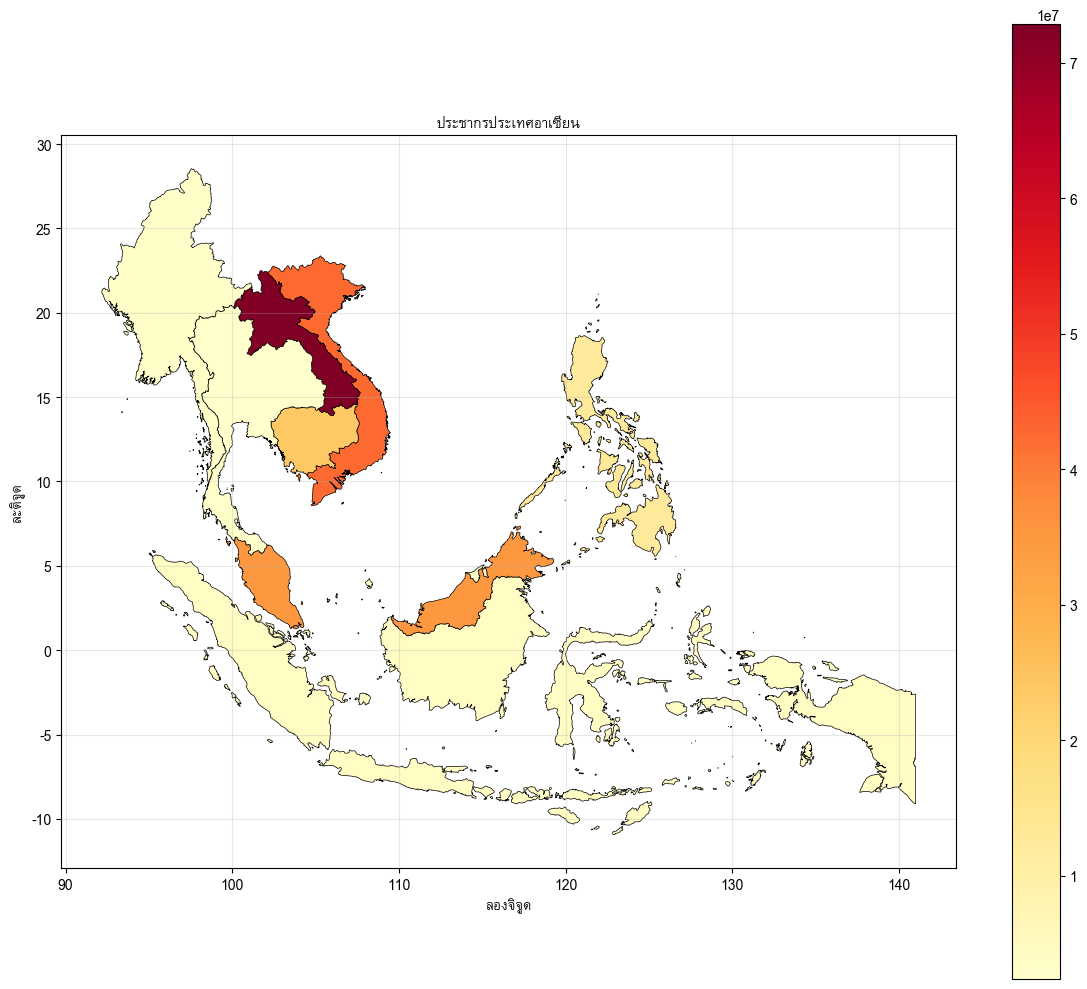

In [92]:
import numpy as np

# เพิ่มคอลัมน์ 'pop_est' จำลองสำหรับสาธิต เนื่องจากข้อมูลเดิมไม่มี
# รีเซ็ตดัชนีเพื่อหลีกเลี่ยงปัญหาหากการกรองส่งผลให้ดัชนีไม่ต่อเนื่อง
asean = asean.reset_index(drop=True)
# กำหนดค่าจำนวนเต็มแบบสุ่มสำหรับประมาณการประชากร
asean['pop_est'] = np.random.randint(1_000_000, 100_000_000, size=len(asean))

# แสดงแผนที่อาเซียน
fig, ax = plt.subplots(figsize=(12, 10))
asean.plot(ax=ax, column='pop_est', cmap='YlOrRd',
           legend=True, edgecolor='black', linewidth=0.5)

# ใช้ font properties สำหรับภาษาไทยหากมี
if 'thai_font_prop' in locals() and thai_font_prop is not None:
    ax.set_title('ประชากรประเทศอาเซียน', fontsize=16, fontweight='bold', fontproperties=thai_font_prop)
    ax.set_xlabel('ลองจิจูด', fontproperties=thai_font_prop)
    ax.set_ylabel('ละติจูด', fontproperties=thai_font_prop)
else:
    ax.set_title('Population of ASEAN Countries', fontsize=16, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4.2 การเขียนไฟล์ออกมา

In [95]:
# บันทึกข้อมูลเป็นรูปแบบต่างๆ

# 1. บันทึกเป็น Shapefile
gdf.to_file('universities.shp')
print("✅ บันทึกเป็น Shapefile แล้ว")

# 2. บันทึกเป็น GeoJSON
gdf.to_file('universities.geojson', driver='GeoJSON')
print("✅ บันทึกเป็น GeoJSON แล้ว")

# 3. บันทึกเป็น GeoPackage
gdf.to_file('universities.gpkg', driver='GPKG')
print("✅ บันทึกเป็น GeoPackage แล้ว")

✅ บันทึกเป็น Shapefile แล้ว
✅ บันทึกเป็น GeoJSON แล้ว
✅ บันทึกเป็น GeoPackage แล้ว


---
## 5. การจัดการและวิเคราะห์ข้อมูลเบื้องต้น

### 5.1 การดูข้อมูลเบื้องต้น

In [ ]:
# ข้อมูลทั่วไป
print("📊 ข้อมูลทั่วไปของ GeoDataFrame:")
print(f"จำนวนแถว: {len(gdf)}")
print(f"จำนวนคอลัมน์: {len(gdf.columns)}")
print(f"\nชนิดข้อมูล:\n{gdf.dtypes}")
print(f"\nค่าสถิติเบื้องต้น:\n{gdf.describe()}")

In [ ]:
# ข้อมูล spatial
print("🗺️ ข้อมูล Spatial:")
print(f"Bounds (ขอบเขต): {gdf.total_bounds}")
print(f"CRS (ระบบพิกัด): {gdf.crs}")
print(f"ประเภท geometry: {gdf.geometry.geom_type.unique()}")

### 5.2 การเปลี่ยนระบบพิกัด (CRS Transformation)

In [ ]:
# ระบบพิกัดที่สำคัญสำหรับประเทศไทย:
# - EPSG:4326 = WGS84 (Latitude/Longitude) - ใช้กับ GPS
# - EPSG:32647 = UTM Zone 47N - ใช้กับภาคเหนือและภาคกลาง
# - EPSG:32648 = UTM Zone 48N - ใช้กับภาคตะวันออกเฉียงเหนือและภาคใต้

print("ระบบพิกัดเดิม (WGS84):")
print(gdf.crs)
print(gdf.geometry.head(2))

# แปลงเป็น UTM Zone 47N
gdf_utm = gdf.to_crs('EPSG:32647')
print("\nระบบพิกัดใหม่ (UTM 47N):")
print(gdf_utm.crs)
print(gdf_utm.geometry.head(2))

### 5.3 การคำนวณค่าทางภูมิศาสตร์

In [ ]:
# คำนวณพื้นที่ (Area)
asean_utm = asean.to_crs('EPSG:32647')  # แปลงเป็น UTM ก่อน
asean_utm['area_km2'] = asean_utm.geometry.area / 1_000_000  # แปลง m² เป็น km²

print("📐 พื้นที่ประเทศอาเซียน (ตร.กม.):")
print(asean_utm[['name', 'area_km2']].sort_values('area_km2', ascending=False))

In [ ]:
# คำนวณความยาว (Length) - สำหรับ LineString
# สร้างเส้นทางตัวอย่าง
route = gpd.GeoDataFrame(
    {'name': ['Bangkok-ChiangMai']},
    geometry=[LineString([(100.5018, 13.7563), (98.9853, 18.7883)])],
    crs='EPSG:4326'
)

route_utm = route.to_crs('EPSG:32647')
route_utm['length_km'] = route_utm.geometry.length / 1000
print("\n📏 ระยะทางโดยตรง กรุงเทพฯ-เชียงใหม่:")
print(f"{route_utm['length_km'].values[0]:.2f} กิโลเมตร")

In [ ]:
# คำนวณ Centroid (จุดศูนย์กลาง)
asean['centroid'] = asean.geometry.centroid
print("📍 จุดศูนย์กลางประเทศอาเซียน:")
print(asean[['name', 'centroid']].head())

---
## 6. การทำ Spatial Operations

### 6.1 Buffer (สร้างแนวกันชน)

In [ ]:
# สร้าง buffer รอบมหาวิทยาลัย (รัศมี 10 กม.)
gdf_buffer = gdf_utm.copy()
gdf_buffer['geometry'] = gdf_buffer.geometry.buffer(10000)  # 10,000 เมตร = 10 กม.

# แสดงผล
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# จุดเดิม
gdf_utm.plot(ax=ax1, color='red', markersize=50)
ax1.set_title('ตำแหน่งมหาวิทยาลัย (จุด)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# buffer
gdf_buffer.plot(ax=ax2, color='lightblue', edgecolor='blue', alpha=0.5)
gdf_utm.plot(ax=ax2, color='red', markersize=50)
ax2.set_title('Buffer รัศมี 10 กม. รอบมหาวิทยาลัย', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"พื้นที่ buffer รวม: {gdf_buffer.geometry.area.sum() / 1_000_000:.2f} ตร.กม.")

### 6.2 Spatial Joins (รวมข้อมูลตามตำแหน่ง)

In [ ]:
# สร้างข้อมูลตัวอย่าง - จุดสำรวจ
survey_points = gpd.GeoDataFrame(
    {
        'survey_id': ['S1', 'S2', 'S3'],
        'pm25': [45, 38, 52],
        'geometry': [Point(100.52, 13.75), Point(100.61, 14.07), Point(100.50, 13.70)]
    },
    crs='EPSG:4326'
)

# แปลงเป็น UTM
survey_utm = survey_points.to_crs('EPSG:32647')

# Spatial join - ดูว่าจุดสำรวจอยู่ใน buffer ของมหาวิทยาลัยไหน
joined = gpd.sjoin(survey_utm, gdf_buffer, how='left', predicate='within')
print("🔗 ผลลัพธ์ Spatial Join:")
print(joined[['survey_id', 'pm25', 'university', 'province']])

# นับจำนวนจุดสำรวจในแต่ละ buffer
count_by_uni = joined.groupby('university').size()
print("\n📊 จำนวนจุดสำรวจในแต่ละพื้นที่:")
print(count_by_uni)

### 6.3 Clip (ตัดข้อมูล)

In [ ]:
# ตัดข้อมูลให้เหลือเฉพาะในบริเวณที่สนใจ
# ตัวอย่าง: ตัดประเทศโลกให้เหลือเฉพาะอาเซียน

# สร้าง bounding box ของอาเซียน
asean_bounds = asean.total_bounds  # [minx, miny, maxx, maxy]
bbox = Polygon([
    (asean_bounds[0], asean_bounds[1]),
    (asean_bounds[2], asean_bounds[1]),
    (asean_bounds[2], asean_bounds[3]),
    (asean_bounds[0], asean_bounds[3])
])
bbox_gdf = gpd.GeoDataFrame([1], geometry=[bbox], crs=asean.crs)

# Clip
world_clipped = gpd.clip(world, bbox_gdf)

# แสดงผล
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

world.plot(ax=ax1, color='lightgray', edgecolor='black')
ax1.set_title('ข้อมูลเดิม (ทั้งโลก)', fontsize=12, fontweight='bold')

world_clipped.plot(ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('หลังตัด (Clip) - บริเวณอาเซียน', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"จำนวนประเทศก่อนตัด: {len(world)}")
print(f"จำนวนประเทศหลังตัด: {len(world_clipped)}")

### 6.4 Dissolve (รวมพื้นที่)

In [ ]:
# รวมทุกประเทศในอาเซียนเป็นพื้นที่เดียว
asean['region'] = 'ASEAN'  # สร้างคอลัมน์เดียวกันสำหรับทุกแถว
asean_dissolved = asean.dissolve(by='region', aggfunc='sum')

print("🔀 ผลลัพธ์ Dissolve:")
print(f"จำนวนแถวก่อน dissolve: {len(asean)}")
print(f"จำนวนแถวหลัง dissolve: {len(asean_dissolved)}")
print(f"\nประชากรรวม ASEAN: {asean_dissolved['pop_est'].values[0]:,.0f} คน")

# แสดงผล
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

asean.plot(ax=ax1, color='lightblue', edgecolor='black', linewidth=1)
ax1.set_title('ก่อน Dissolve (แยกประเทศ)', fontsize=12, fontweight='bold')

asean_dissolved.plot(ax=ax2, color='orange', edgecolor='red', linewidth=2)
ax2.set_title('หลัง Dissolve (รวมเป็นพื้นที่เดียว)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 7. แนะนำ GeoParquet - รูปแบบไฟล์ยุคใหม่

### GeoParquet คืออะไร?

**GeoParquet** เป็นรูปแบบไฟล์เก็บข้อมูลเชิงพื้นที่แบบ columnar ที่:
- 🚀 **เร็วกว่า** Shapefile หลายเท่า
- 💾 **ประหยัดพื้นที่** - มีการบีบอัดข้อมูล
- 📦 **ไฟล์เดียว** - ไม่มีไฟล์เสริม (.shp, .shx, .dbf, .prj)
- 🔧 **รองรับ Big Data** - เหมาะกับข้อมูลขนาดใหญ่
- ☁️ **Cloud-friendly** - เหมาะกับ cloud storage

### เปรียบเทียบรูปแบบไฟล์

| Feature | Shapefile | GeoJSON | GeoParquet |
|---------|-----------|---------|------------|
| ขนาดไฟล์ | ใหญ่ | ใหญ่มาก | เล็ก |
| ความเร็วอ่าน | ช้า | ช้ามาก | เร็วมาก |
| จำนวนไฟล์ | หลายไฟล์ | 1 ไฟล์ | 1 ไฟล์ |
| ความเข้ากันได้ | สูง | สูง | ปานกลาง (ใหม่) |
| Big Data | ไม่เหมาะ | ไม่เหมาะ | เหมาะมาก |

### 7.1 การเขียนไฟล์ GeoParquet

In [ ]:
import os

# บันทึกข้อมูลเป็น GeoParquet
asean.to_parquet('asean.parquet')
print("✅ บันทึกเป็น GeoParquet แล้ว")

# บันทึกเป็น Shapefile และ GeoJSON เพื่อเปรียบเทียบ
asean.to_file('asean.shp')
asean.to_file('asean.geojson', driver='GeoJSON')
print("✅ บันทึกเป็น Shapefile และ GeoJSON แล้ว")

# เปรียบเทียบขนาดไฟล์
parquet_size = os.path.getsize('asean.parquet') / 1024  # KB
geojson_size = os.path.getsize('asean.geojson') / 1024  # KB

# Shapefile ประกอบด้วยหลายไฟล์
shp_files = ['asean.shp', 'asean.shx', 'asean.dbf', 'asean.prj']
shp_size = sum(os.path.getsize(f) / 1024 for f in shp_files if os.path.exists(f))

print("\n📊 เปรียบเทียบขนาดไฟล์:")
print(f"GeoParquet: {parquet_size:.2f} KB")
print(f"GeoJSON:    {geojson_size:.2f} KB")
print(f"Shapefile:  {shp_size:.2f} KB (รวมทุกไฟล์)")
print(f"\nGeoParquet เล็กกว่า GeoJSON: {geojson_size/parquet_size:.1f}x")
print(f"GeoParquet เล็กกว่า Shapefile: {shp_size/parquet_size:.1f}x")

### 7.2 การอ่านไฟล์ GeoParquet

In [ ]:
import time

# วัดเวลาในการอ่านไฟล์แต่ละประเภท

# อ่าน GeoParquet
start = time.time()
gdf_parquet = gpd.read_parquet('asean.parquet')
parquet_time = time.time() - start

# อ่าน Shapefile
start = time.time()
gdf_shp = gpd.read_file('asean.shp')
shp_time = time.time() - start

# อ่าน GeoJSON
start = time.time()
gdf_geojson = gpd.read_file('asean.geojson')
geojson_time = time.time() - start

print("⚡ เปรียบเทียบความเร็วในการอ่านไฟล์:")
print(f"GeoParquet: {parquet_time*1000:.2f} มิลลิวินาที")
print(f"Shapefile:  {shp_time*1000:.2f} มิลลิวินาที")
print(f"GeoJSON:    {geojson_time*1000:.2f} มิลลิวินาที")

print(f"\nGeoParquet เร็วกว่า Shapefile: {shp_time/parquet_time:.1f}x")
print(f"GeoParquet เร็วกว่า GeoJSON:   {geojson_time/parquet_time:.1f}x")

# ตรวจสอบว่าข้อมูลเหมือนกัน
print(f"\n✅ ข้อมูลครบถ้วนและเหมือนกัน: {len(gdf_parquet) == len(gdf_shp) == len(gdf_geojson)}")

### 7.3 การอ่านเฉพาะคอลัมน์ที่ต้องการ (Column Selection)

In [ ]:
# ข้อดีของ GeoParquet: อ่านเฉพาะคอลัมน์ที่ต้องการได้
# เหมาะสำหรับไฟล์ขนาดใหญ่ที่มีหลายคอลัมน์

# อ่านเฉพาะชื่อประเทศและ geometry
gdf_selected = gpd.read_parquet('asean.parquet', columns=['name', 'geometry'])

print("📋 อ่านเฉพาะคอลัมน์ name และ geometry:")
print(gdf_selected)
print(f"\nคอลัมน์ทั้งหมดในไฟล์: {gdf_parquet.columns.tolist()}")
print(f"คอลัมน์ที่อ่านมา: {gdf_selected.columns.tolist()}")

### 7.4 การใช้ GeoParquet กับข้อมูลขนาดใหญ่

In [ ]:
# สร้างข้อมูลจำลองขนาดใหญ่
import numpy as np

# สร้าง 10,000 จุด random
n_points = 10000
lons = np.random.uniform(95, 106, n_points)  # Longitude ในบริเวณอาเซียน
lats = np.random.uniform(5, 20, n_points)    # Latitude ในบริเวณอาเซียน

large_gdf = gpd.GeoDataFrame(
    {
        'id': range(n_points),
        'value1': np.random.randint(0, 100, n_points),
        'value2': np.random.random(n_points) * 1000,
        'category': np.random.choice(['A', 'B', 'C', 'D'], n_points),
        'geometry': [Point(lon, lat) for lon, lat in zip(lons, lats)]
    },
    crs='EPSG:4326'
)

print(f"สร้างข้อมูลจำลอง {n_points:,} จุด")
print(large_gdf.head())

# บันทึกเป็น Shapefile และ GeoParquet
start = time.time()
large_gdf.to_file('large_data.shp')
shp_write_time = time.time() - start

start = time.time()
large_gdf.to_parquet('large_data.parquet')
parquet_write_time = time.time() - start

print(f"\n⏱️ เวลาในการบันทึกข้อมูล {n_points:,} จุด:")
print(f"Shapefile:   {shp_write_time:.3f} วินาที")
print(f"GeoParquet:  {parquet_write_time:.3f} วินาที")
print(f"GeoParquet เร็วกว่า: {shp_write_time/parquet_write_time:.1f}x")

# เปรียบเทียบขนาดไฟล์
large_parquet_size = os.path.getsize('large_data.parquet') / (1024*1024)  # MB
large_shp_files = ['large_data.shp', 'large_data.shx', 'large_data.dbf', 'large_data.prj']
large_shp_size = sum(os.path.getsize(f) / (1024*1024) for f in large_shp_files if os.path.exists(f))

print(f"\n💾 ขนาดไฟล์:")
print(f"Shapefile:   {large_shp_size:.2f} MB")
print(f"GeoParquet:  {large_parquet_size:.2f} MB")
print(f"ประหยัดพื้นที่: {(1 - large_parquet_size/large_shp_size)*100:.1f}%")

### 7.5 ข้อแนะนำในการเลือกใช้รูปแบบไฟล์

#### ใช้ **Shapefile** เมื่อ:
- ✅ ต้องการความเข้ากันได้สูง (legacy systems)
- ✅ ทำงานกับผู้อื่นที่ใช้ ArcGIS/QGIS เป็นหลัก
- ✅ ข้อมูลขนาดเล็ก ไม่ต้องการความเร็วมากนัก

#### ใช้ **GeoJSON** เมื่อ:
- ✅ พัฒนา web applications
- ✅ ต้องการอ่านได้ง่ายด้วยตา (human-readable)
- ✅ ใช้กับ JavaScript/web APIs

#### ใช้ **GeoParquet** เมื่อ:
- ✅ ข้อมูลขนาดใหญ่ (> 100 MB)
- ✅ ต้องการความเร็วในการประมวลผล
- ✅ ทำงานกับ cloud storage
- ✅ ต้องการประหยัดพื้นที่จัดเก็บ
- ✅ ทำงานกับ Python/pandas ecosystem

---
## 8. ตัวอย่างการประยุกต์ใช้จริง

### กรณีศึกษา: วิเคราะห์การเข้าถึงโรงพยาบาลในพื้นที่

In [ ]:
# สร้างข้อมูลจำลอง - ตำแหน่งโรงพยาบาลในกรุงเทพฯ
hospitals = gpd.GeoDataFrame(
    {
        'name': ['โรงพยาบาล A', 'โรงพยาบาล B', 'โรงพยาบาล C'],
        'beds': [500, 300, 400],
        'type': ['ทั่วไป', 'เฉพาะทาง', 'ทั่วไป'],
        'geometry': [
            Point(100.523, 13.756),
            Point(100.560, 13.730),
            Point(100.490, 13.780)
        ]
    },
    crs='EPSG:4326'
)

# สร้างข้อมูลจำลอง - ชุมชน
communities = gpd.GeoDataFrame(
    {
        'name': ['ชุมชน 1', 'ชุมชน 2', 'ชุมชน 3', 'ชุมชน 4'],
        'population': [5000, 3000, 7000, 4500],
        'geometry': [
            Point(100.510, 13.750),
            Point(100.570, 13.740),
            Point(100.495, 13.790),
            Point(100.540, 13.720)
        ]
    },
    crs='EPSG:4326'
)

print("🏥 โรงพยาบาล:")
print(hospitals)
print("\n🏘️ ชุมชน:")
print(communities)

In [ ]:
# แปลงเป็น UTM เพื่อคำนวณระยะทาง
hospitals_utm = hospitals.to_crs('EPSG:32647')
communities_utm = communities.to_crs('EPSG:32647')

# สร้าง buffer 3 กม. รอบโรงพยาบาล
hospitals_buffer = hospitals_utm.copy()
hospitals_buffer['geometry'] = hospitals_buffer.geometry.buffer(3000)

# หาชุมชนที่อยู่ใน buffer (เข้าถึงโรงพยาบาลได้ภายใน 3 กม.)
communities_near = gpd.sjoin(communities_utm, hospitals_buffer, how='left', predicate='within')

print("📊 ผลการวิเคราะห์:")
print("Columns in communities_near after sjoin:", communities_near.columns.tolist())
# Corrected: Use 'name_left' for community name and 'beds' for hospital beds
print(communities_near[['name_left', 'population', 'name_right', 'beds']])

# นับจำนวนประชากรที่เข้าถึงโรงพยาบาล
accessible = communities_near[communities_near['name_right'].notna()]
total_accessible = accessible['population'].sum()
total_population = communities_utm['population'].sum()

print(f"\n✅ ประชากรที่เข้าถึงโรงพยาบาลได้ (< 3 กม.): {total_accessible:,} คน ({total_accessible/total_population*100:.1f}%)")
print(f"❌ ประชากรที่เข้าถึงยาก: {total_population - total_accessible:,} คน ({(total_population - total_accessible)/total_population*100:.1f}%)")

In [ ]:
# แสดงผลบนแผนที่
fig, ax = plt.subplots(figsize=(12, 10))

# Buffer zones
hospitals_buffer.plot(ax=ax, color='lightblue', alpha=0.3, label='พื้นที่บริการ 3 กม.')

# ชุมชน
communities_utm.plot(ax=ax, color='green', markersize=communities_utm['population']/50,
                     alpha=0.6, label='ชุมชน', edgecolor='darkgreen')

# โรงพยาบาล
hospitals_utm.plot(ax=ax, color='red', marker='^', markersize=200,
                   label='โรงพยาบาล', edgecolor='darkred', linewidth=2)

# เพิ่ม labels
for idx, row in hospitals_utm.iterrows():
    ax.annotate(row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold', color='darkred')

for idx, row in communities_utm.iterrows():
    ax.annotate(f"{row['name']}\n({row['population']:,} คน)",
                xy=(row.geometry.x, row.geometry.y),
                xytext=(5, -10), textcoords='offset points',
                fontsize=8, color='darkgreen')

ax.set_title('การวิเคราะห์การเข้าถึงโรงพยาบาล', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# บันทึกผลลัพธ์เป็น GeoParquet
communities_near.to_parquet('hospital_accessibility_analysis.parquet')
print("✅ บันทึกผลการวิเคราะห์แล้ว: hospital_accessibility_analysis.parquet")

# สร้าง summary report
summary = pd.DataFrame({
    'metric': ['จำนวนชุมชนทั้งหมด', 'จำนวนชุมชนที่เข้าถึงได้', 'ประชากรรวม',
               'ประชากรที่เข้าถึงได้', 'เปอร์เซ็นต์การเข้าถึง'],
    'value': [len(communities), len(accessible), total_population,
              total_accessible, f"{total_accessible/total_population*100:.1f}%"]
})

print("\n📋 สรุปผลการวิเคราะห์:")
print(summary.to_string(index=False))

---
## 📝 สรุปและแนวทางการเรียนรู้ต่อ

### สิ่งที่ได้เรียนรู้:

1. ✅ โครงสร้างข้อมูลของ GeoPandas (GeoDataFrame)
2. ✅ การอ่านและเขียนไฟล์ข้อมูลเชิงพื้นที่
3. ✅ การจัดการและวิเคราะห์ข้อมูลเบื้องต้น
4. ✅ Spatial Operations: Buffer, Spatial Join, Clip, Dissolve
5. ✅ GeoParquet - รูปแบบไฟล์ยุคใหม่ที่เร็วและประหยัดพื้นที่
6. ✅ การประยุกต์ใช้จริงในงานวิเคราะห์เชิงพื้นที่

### แหล่งเรียนรู้เพิ่มเติม:

#### 📚 เอกสารอย่างเป็นทางการ:
- [GeoPandas Documentation](https://geopandas.org/)
- [Shapely Documentation](https://shapely.readthedocs.io/)
- [GeoParquet Specification](https://geoparquet.org/)

#### 🎓 หัวข้อขั้นสูงที่ควรเรียนรู้ต่อ:
1. **Spatial Analysis** - การวิเคราะห์เชิงพื้นที่ขั้นสูง
   - Point Pattern Analysis
   - Network Analysis
   - Spatial Statistics

2. **Geocoding และ Coordinate Systems**
   - การแปลงที่อยู่เป็นพิกัด
   - การทำงานกับระบบพิกัดต่างๆ
   - Projection transformations

3. **Web Mapping**
   - Folium (interactive maps)
   - Plotly (interactive visualization)
   - Leaflet integration

4. **Big Geospatial Data**
   - Dask-GeoPandas
   - Cloud-native formats
   - Distributed processing

5. **Integration with other tools**
   - Google Earth Engine
   - Rasterio (raster data)
   - PostgreSQL/PostGIS

### 💡 เคล็ดลับสำหรับนักศึกษา:

1. **ฝึกฝนบ่อยๆ** - ลองใช้ข้อมูลจริงในพื้นที่ที่คุณสนใจ
2. **อ่าน error messages** - ข้อผิดพลาดคือโอกาสในการเรียนรู้
3. **ใช้ CRS ให้ถูกต้อง** - ตรวจสอบระบบพิกัดก่อนทำ spatial operations
4. **เลือกรูปแบบไฟล์ให้เหมาะสม** - GeoParquet สำหรับข้อมูลใหญ่, Shapefile สำหรับแชร์
5. **เข้าร่วม Community** - Stack Overflow, GIS Stack Exchange

---

### 🎯 แบบฝึกหัดท้ายบท:

1. ลองสร้าง GeoDataFrame จากข้อมูลตำแหน่ง 5 สถานที่ในมหาวิทยาลัยของคุณ
2. สร้าง buffer 500 เมตรรอบแต่ละจุด และหาพื้นที่ที่ทับซ้อนกัน
3. บันทึกผลลัพธ์ทั้งแบบ Shapefile และ GeoParquet แล้วเปรียบเทียบ
4. ลองใช้ข้อมูล OpenStreetMap (OSM) ของพื้นที่ใกล้คุณ

---

**พัฒนาโดย:** ภาควิชาภูมิศาสตร์ คณะศิลปศาสตร์ มหาวิทยาลัยธรรมศาสตร์  
**วันที่:** 2025  
**License:** MIT License - ใช้งานได้ฟรีเพื่อการศึกษา

**1.ลองสร้าง GeoDataFrame จากข้อมูลตำแหน่ง 5 สถานที่ในมหาวิทยาลัยของคุณ**

In [ ]:
# 1. สร้างข้อมูลตัวอย่าง - 5 สถานที่ในมหาวิทยาลัยธรรมศาสตร์
data = {
    'location': ['อาคารเรียนรวมสังคมศาสตร์ 3 (SC3)', 'ศูนย์การแพทย์ธรรมศาสตร์', 'ยิมเนเซียม 4 ธรรมศาสตร์', 'ศูนย์อาหารทิวสนโดม' ,
              'โรงเรียนสาธิตแห่งมหาวิทยาลัยธรรมศาสตร์ (อาคาร D)'],
    'latitude': [14.0706, 14.0727, 14.0661, 14.0762, 14.0770],
    'longitude': [100.6057, 100.6158, 100.6033, 100.5955, 100.5979]
}

# 2. สร้าง DataFrame ธรรมดา
df = pd.DataFrame(data)
print("📊 DataFrame ธรรมดา:")
print(df)
print(f"\nประเภท: {type(df)}")

# 3. แปลง DataFrame เป็น GeoDataFrame
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

print("🗺️ GeoDataFrame:")
print(gdf)
print(f"\nประเภท: {type(gdf)}")
print(f"\nระบบพิกัด (CRS): {gdf.crs}")

# 4. ดูข้อมูล geometry แยกต่างหาก
print("📍 คอลัมน์ geometry:")
print(gdf.geometry)
print(f"\nประเภทของ geometry: {gdf.geometry.geom_type.unique()}")

# 5. แสดงผลบนแผนที่อย่างง่าย
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, marker='o', color='red', markersize=100, alpha=0.6)

# เพิ่ม labels
for idx, row in gdf.iterrows():
    ax.annotate(row['location'],
                xy=(row.geometry.x, row.geometry.y),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, ha='left')

ax.set_xlabel('Longitude (ลองจิจูด)')
ax.set_ylabel('Latitude (ละติจูด)')
ax.set_title('ตำแหน่ง 5 สถานที่ในมหาวิทยาลัยธรรมศาสตร์', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**2.สร้าง buffer 500 เมตรรอบแต่ละจุด และหาพื้นที่ที่ทับซ้อนกัน**

In [ ]:
# Create a UTM version of the local university GeoDataFrame for accurate buffer calculation
# Using UTM Zone 47N (EPSG:32647) which is suitable for Bangkok/central Thailand
gdf_local_utm = gdf.to_crs('EPSG:32647')

# Create buffers of 500 meters around each point
gdf_buffer_local = gdf_local_utm.copy()
gdf_buffer_local['geometry'] = gdf_buffer_local.geometry.buffer(500)  # 500 meters

# Find the union of all buffers to visualize total coverage and overlaps
# This will merge overlapping buffers into a single geometry
all_buffers_union = gdf_buffer_local.unary_union

# Calculate the area of each individual buffer and the total combined area
gdf_buffer_local['area_sqm'] = gdf_buffer_local.geometry.area
total_individual_buffer_area_sqm = gdf_buffer_local['area_sqm'].sum()
union_buffer_area_sqm = all_buffers_union.area

overlapping_area_sqm = total_individual_buffer_area_sqm - union_buffer_area_sqm

# Display the results
fig, ax = plt.subplots(1, 1, figsize=(10, 10)) # Use a single plot for clarity

# Plot the individual buffers
gdf_buffer_local.plot(ax=ax, color='lightblue', edgecolor='blue', alpha=0.5, label='Buffer 500m')

# Plot the original points
gdf_local_utm.plot(ax=ax, marker='o', color='red', markersize=50, label='Location')

# Add labels for each buffer/point
for idx, row in gdf_local_utm.iterrows():
    # Check if thai_font_prop is defined and use it for annotation
    if 'thai_font_prop' in locals() and thai_font_prop is not None:
        ax.annotate(row['location'],
                    xy=(row.geometry.x, row.geometry.y),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, ha='left', fontproperties=thai_font_prop)
    else:
        ax.annotate(row['location'],
                    xy=(row.geometry.x, row.geometry.y),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, ha='left')

# Set titles and labels
if 'thai_font_prop' in locals() and thai_font_prop is not None:
    ax.set_title('Buffer 500 เมตร รอบแต่ละสถานที่ในมหาวิทยาลัยธรรมศาสตร์', fontsize=14, fontweight='bold', fontproperties=thai_font_prop)
    ax.set_xlabel('พิกัด X (UTM)', fontproperties=thai_font_prop)
    ax.set_ylabel('พิกัด Y (UTM)', fontproperties=thai_font_prop)
else:
    ax.set_title('500m Buffer Around Each University Location', fontsize=14, fontweight='bold')
    ax.set_xlabel('UTM X-coordinate')
    ax.set_ylabel('UTM Y-coordinate')

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"พื้นที่รวมของแต่ละ buffer (ไม่รวมพื้นที่ทับซ้อน): {total_individual_buffer_area_sqm / 1_000_000:.2f} ตร.กม.")
print(f"พื้นที่รวมทั้งหมดที่ถูกปกคลุมโดย buffer (พื้นที่รวมของ Union): {union_buffer_area_sqm / 1_000_000:.2f} ตร.กม.")
print(f"พื้นที่ที่ทับซ้อนกัน (พื้นที่รวมของแต่ละ buffer - พื้นที่รวมของ Union): {overlapping_area_sqm / 1_000_000:.2f} ตร.กม.")

**3.บันทึกผลลัพธ์ทั้งแบบ Shapefile และ GeoParquet แล้วเปรียบเทียบ**

In [ ]:
import os
import time

# บันทึกข้อมูลเป็นรูปแบบต่างๆ

# 1. บันทึกเป็น Shapefile
gdf.to_file('location.shp')
print("✅ บันทึกเป็น Shapefile แล้ว")

# 2. บันทึกเป็น GeoJSON
gdf.to_file('location.geojson', driver='GeoJSON')
print("✅ บันทึกเป็น GeoJSON แล้ว")

# 3. บันทึกเป็น GeoPackage
gdf.to_file('location.gpkg', driver='GPKG')
print("✅ บันทึกเป็น GeoPackage แล้ว")

# 4. บันทึกเป็น GeoParquet
gdf.to_parquet('location.parquet')
print("✅ บันทึกเป็น GeoParquet แล้ว")

# เปรียบเทียบขนาดไฟล์
parquet_size = os.path.getsize('location.parquet') / 1024  # KB
geojson_size = os.path.getsize('location.geojson') / 1024  # KB
gpkg_size = os.path.getsize('location.gpkg') / 1024  # KB

# Shapefile ประกอบด้วยหลายไฟล์
shp_files = ['location.shp', 'location.shx', 'location.dbf', 'location.prj']
shp_size = sum(os.path.getsize(f) / 1024 for f in shp_files if os.path.exists(f))

print("\n📊 เปรียบเทียบขนาดไฟล์:")
print(f"GeoParquet: {parquet_size:.2f} KB")
print(f"GeoJSON:    {geojson_size:.2f} KB")
print(f"GeoPackage: {gpkg_size:.2f} KB")
print(f"Shapefile:  {shp_size:.2f} KB (รวมทุกไฟล์)")

# เปรียบเทียบความเร็วในการอ่านไฟล์
print("\n⚡ เปรียบเทียบความเร็วในการอ่านไฟล์:")

# อ่าน GeoParquet
start = time.time()
gdf_parquet = gpd.read_parquet('location.parquet')
parquet_time = time.time() - start
print(f"GeoParquet: {parquet_time*1000:.2f} มิลลิวินาที")

# อ่าน Shapefile
start = time.time()
gdf_shp = gpd.read_file('location.shp')
shp_time = time.time() - start
print(f"Shapefile:  {shp_time*1000:.2f} มิลลิวินาที")

# อ่าน GeoJSON
start = time.time()
gdf_geojson = gpd.read_file('location.geojson')
geojson_time = time.time() - start
print(f"GeoJSON:    {geojson_time*1000:.2f} มิลลิวินาที")

# อ่าน GeoPackage
start = time.time()
gdf_gpkg = gpd.read_file('location.gpkg')
gpkg_time = time.time() - start
print(f"GeoPackage: {gpkg_time*1000:.2f} มิลลิวินาที")

print(f"\nGeoParquet เร็วกว่า Shapefile: {shp_time/parquet_time:.1f}x")
print(f"GeoParquet เร็วกว่า GeoJSON:   {geojson_time/parquet_time:.1f}x")
print(f"GeoParquet เร็วกว่า GeoPackage: {gpkg_time/parquet_time:.1f}x")

# ตรวจสอบว่าข้อมูลเหมือนกัน
print(f"\n✅ ข้อมูลครบถ้วนและเหมือนกัน: {len(gdf_parquet) == len(gdf_shp) == len(gdf_geojson) == len(gdf_gpkg)}")

**4.ลองใช้ข้อมูล OpenStreetMap (OSM) ของพื้นที่ใกล้คุณ**

In [111]:
!pip install osmnx geopandas

In [112]:
import folium

# Get the coordinates for centering the map (e.g., from the university point)
map_center_lat = point_lat
map_center_lon = point_lon

# Create a folium map centered at the university
m = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=15)

# Try to find the specific Puey Ungphakorn Library entry that is a Point geometry first
puey_library_geometry = puey_ungphakorn_library[
    (puey_ungphakorn_library['name:en'] == 'Puey Ungphakorn Library')
]

if not puey_library_geometry.empty:
    # Prioritize Point geometries
    point_entry = puey_library_geometry[puey_library_geometry.geometry.geom_type == 'Point']

    if not point_entry.empty:
        row_to_plot = point_entry.iloc[0]
        location_to_plot = [row_to_plot.geometry.y, row_to_plot.geometry.x]
        name_to_plot = row_to_plot.get('name:en', row_to_plot.get('name', 'Puey Ungphakorn Library'))
        print("✅ Added Puey Ungphakorn Library marker (Point geometry).")
    else:
        # If no Point geometry, check for Polygon and use its centroid
        polygon_entry = puey_library_geometry[puey_library_geometry.geometry.geom_type == 'Polygon']
        if not polygon_entry.empty:
            row_to_plot = polygon_entry.iloc[0]
            location_to_plot = [row_to_plot.geometry.centroid.y, row_to_plot.geometry.centroid.x]
            name_to_plot = row_to_plot.get('name:en', row_to_plot.get('name', 'Puey Ungphakorn Library'))
            print("✅ Added Puey Ungphakorn Library marker (Polygon centroid).")
        else:
            # If neither Point nor Polygon, then we can't plot it directly as a marker
            print("❌ Puey Ungphakorn Library found, but not as Point or Polygon geometry.")
            location_to_plot = None # Set to None to prevent marker creation

    if location_to_plot:
        folium.Marker(
            location=location_to_plot,
            popup=name_to_plot,
            tooltip=name_to_plot
        ).add_to(m)
else:
    print("❌ Puey Ungphakorn Library (by name) not found in the fetched data.")

# Display the map
m

✅ Added Puey Ungphakorn Library marker (Polygon centroid).
